<a href="https://colab.research.google.com/github/KhushiChoubey26/Time_Series_Forecasting_Project/blob/main/Time_Series_Forecasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
!pip install keras tensorflow


In [1]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

import warnings
warnings. filterwarnings("ignore")

sns.set(rc={"axes.facecolor": "Beige", "axes.grid": False})


In [3]:
from google.colab import files

uploaded = files.upload()


Saving Adani Green Energy Limited (ADANIGREEN.NS).csv to Adani Green Energy Limited (ADANIGREEN.NS).csv


from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()


In [4]:
# List the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')


Uploaded file: Adani Green Energy Limited (ADANIGREEN.NS).csv


In [5]:
data_url = 'Adani Green Energy Limited (ADANIGREEN.NS).csv'
df = pd.read_csv(data_url, parse_dates=['Date'], dayfirst=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,41.849998,41.849998,41.150002,41.400002,41.400002,105166
1,2019-01-02,41.099998,42.500000,40.549999,41.150002,41.150002,288827
2,2019-01-03,41.500000,42.150002,40.750000,40.950001,40.950001,211035
3,2019-01-04,40.950001,41.299999,40.400002,40.549999,40.549999,169984
4,2019-01-07,41.000000,42.250000,41.000000,41.099998,41.099998,292864


In [6]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [7]:
df = df.dropna(how='all')
print(df)

            Date         Open         High          Low        Close  \
0     2019-01-01    41.849998    41.849998    41.150002    41.400002   
1     2019-01-02    41.099998    42.500000    40.549999    41.150002   
2     2019-01-03    41.500000    42.150002    40.750000    40.950001   
3     2019-01-04    40.950001    41.299999    40.400002    40.549999   
4     2019-01-07    41.000000    42.250000    41.000000    41.099998   
...          ...          ...          ...          ...          ...   
1346  2024-06-18  1825.000000  1840.300049  1808.000000  1814.000000   
1347  2024-06-19  1820.000000  1821.650024  1775.000000  1789.650024   
1348  2024-06-20  1807.750000  1816.400024  1785.500000  1806.400024   
1349  2024-06-21  1810.000000  1814.300049  1775.250000  1780.449951   
1350  2024-06-24  1783.800049  1795.849976  1771.000000  1795.699951   

        Adj Close  Volume  
0       41.400002  105166  
1       41.150002  288827  
2       40.950001  211035  
3       40.549999  1699

In [8]:
df = df[~df['Date'].duplicated(keep='first')] # ensuring the index is unique by removing duplicate dates



In [9]:
df = df.set_index('Date')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,41.849998,41.849998,41.150002,41.400002,41.400002,105166
2019-01-02,41.099998,42.500000,40.549999,41.150002,41.150002,288827
2019-01-03,41.500000,42.150002,40.750000,40.950001,40.950001,211035
2019-01-04,40.950001,41.299999,40.400002,40.549999,40.549999,169984
2019-01-07,41.000000,42.250000,41.000000,41.099998,41.099998,292864


In [10]:
df.index = pd.to_datetime(df.index)


In [11]:
df_weekly = df.resample('W').mean() #resampling the data to a weekly frequency
df_weekly.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-06,41.349999,41.95,40.712501,41.012501,41.012501,193753.0
2019-01-13,40.980000,41.45,40.400000,40.580000,40.580000,228339.6
2019-01-20,39.860000,40.16,38.810000,39.180000,39.180000,213361.0
2019-01-27,38.100000,38.52,36.660000,37.220000,37.220000,167851.2
2019-02-03,35.760001,37.36,33.710000,35.210000,35.210000,585904.8


In [12]:
test_date = df_weekly[-10:]
df_weekly = df_weekly[:-10]

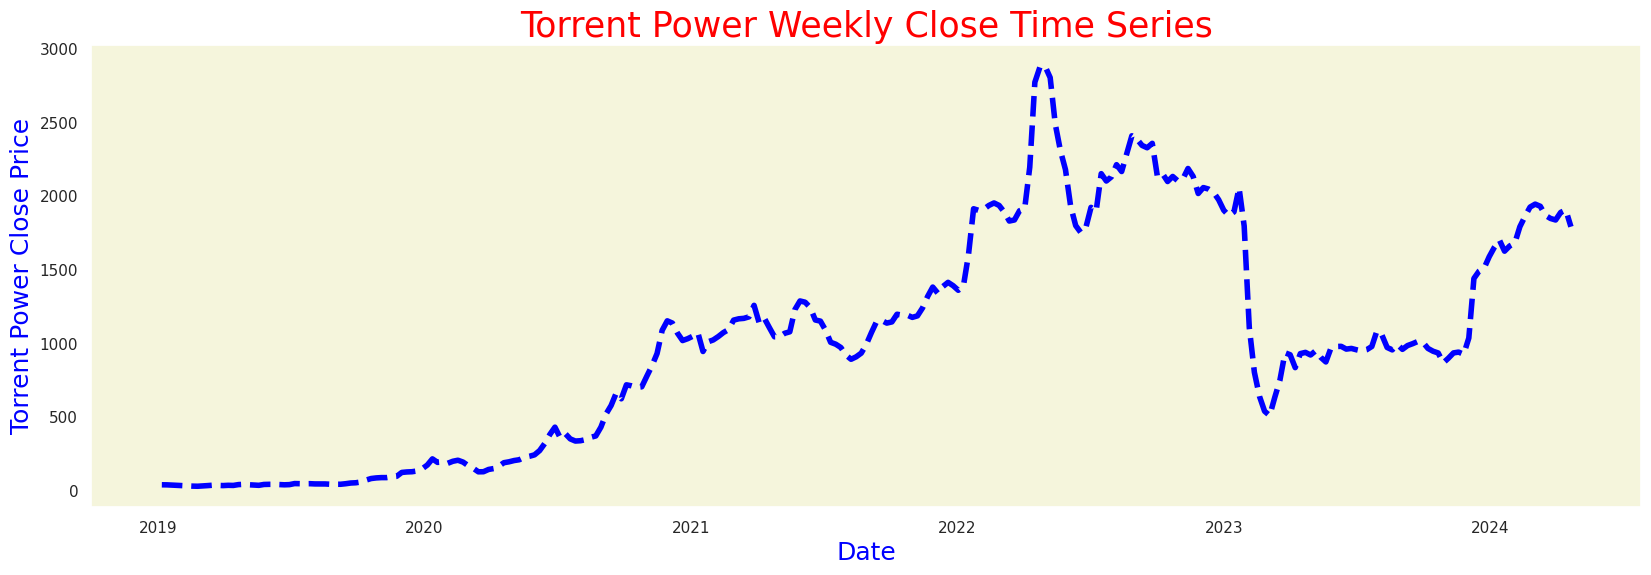

In [13]:
#time series of torrent power
plt.figure(figsize=(20,6))
plt.plot(df_weekly.index, df_weekly['Close'], lw=4, color='Blue', ls='--')
plt.title('Torrent Power Weekly Close Time Series', fontsize=25, color = 'Red')
plt.xlabel('Date', fontsize=18, color = 'Blue')
plt.ylabel('Torrent Power Close Price', fontsize=18, color = 'Blue')
plt.show()

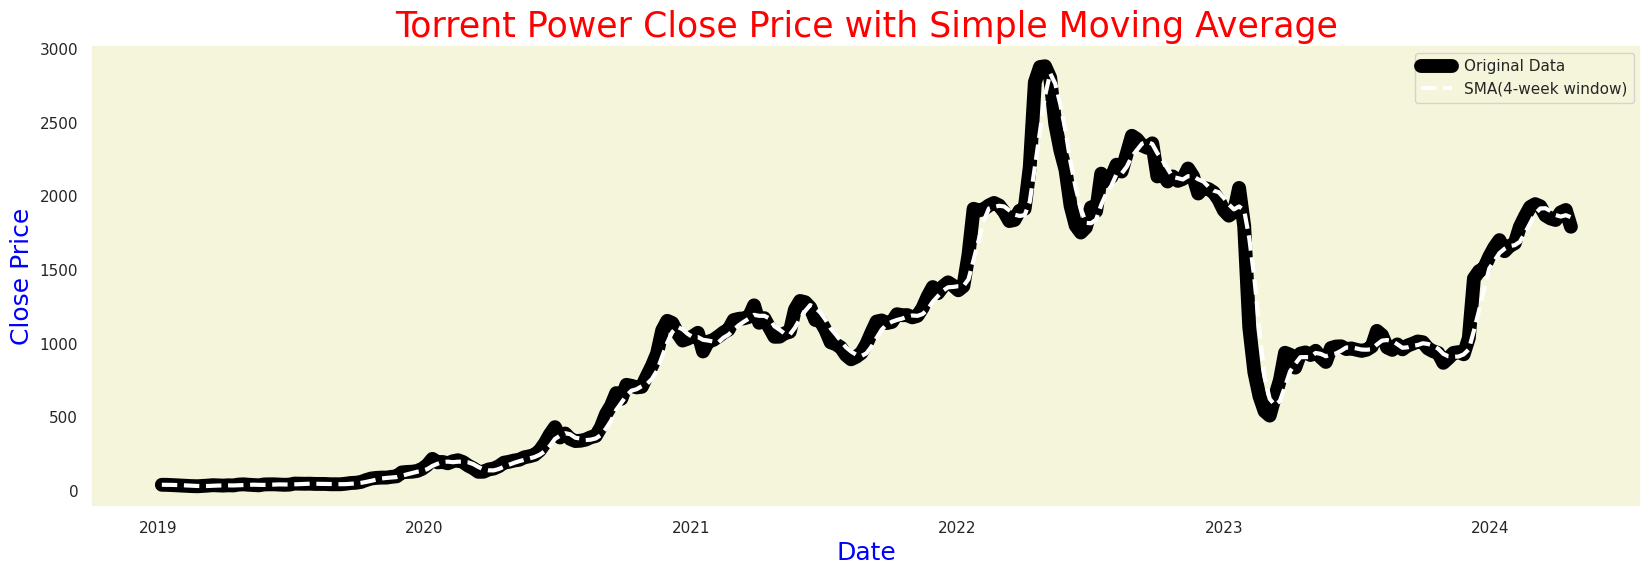

In [14]:
#
window_size = 4
df_weekly['SMA'] = df_weekly['Close'].rolling(window=window_size, min_periods=1).mean()

plt.figure(figsize=(20,6))
plt.plot(df_weekly.index, df_weekly['Close'], label='Original Data', lw=10, color='Black')
plt.plot(df_weekly.index, df_weekly['SMA'], label=f'SMA({window_size}-week window)', lw=3, color='White', ls='--')
plt.title('Torrent Power Close Price with Simple Moving Average', fontsize=25, color = 'Red')
plt.xlabel('Date', fontsize=18, color = 'Blue')
plt.ylabel('Close Price', fontsize=18, color = 'Blue')
plt.legend()
plt.show()

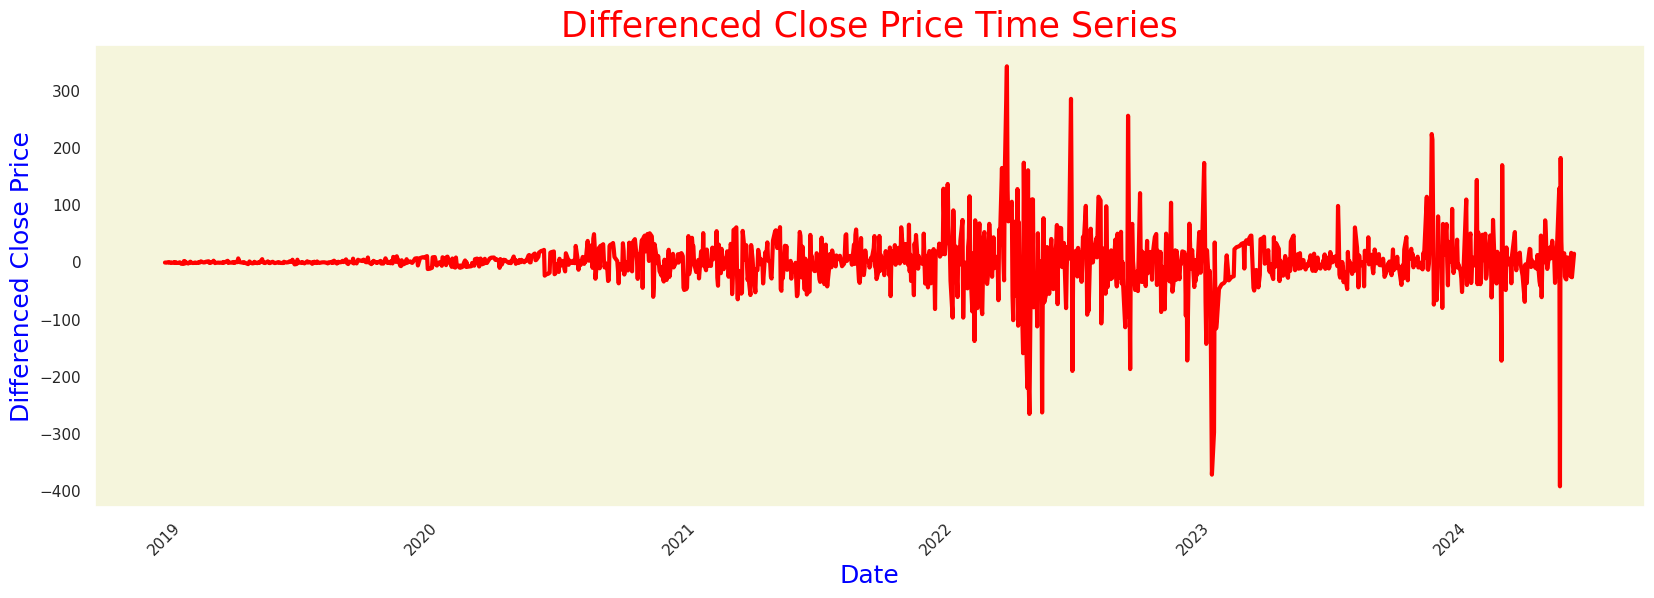

In [15]:
df['Diff_Close'] = df['Close'].diff()

plt.figure(figsize=(20,6))
plt.plot(df.index, df['Diff_Close'], label='Diff_Close',lw= 3, color='Red')
plt.title('Differenced Close Price Time Series', fontsize=25, color = 'Red')
plt.xlabel('Date', fontsize=18, color = 'Blue')
plt.ylabel('Differenced Close Price', fontsize=18, color = 'Blue')
plt.xticks(rotation=45)
plt.show()

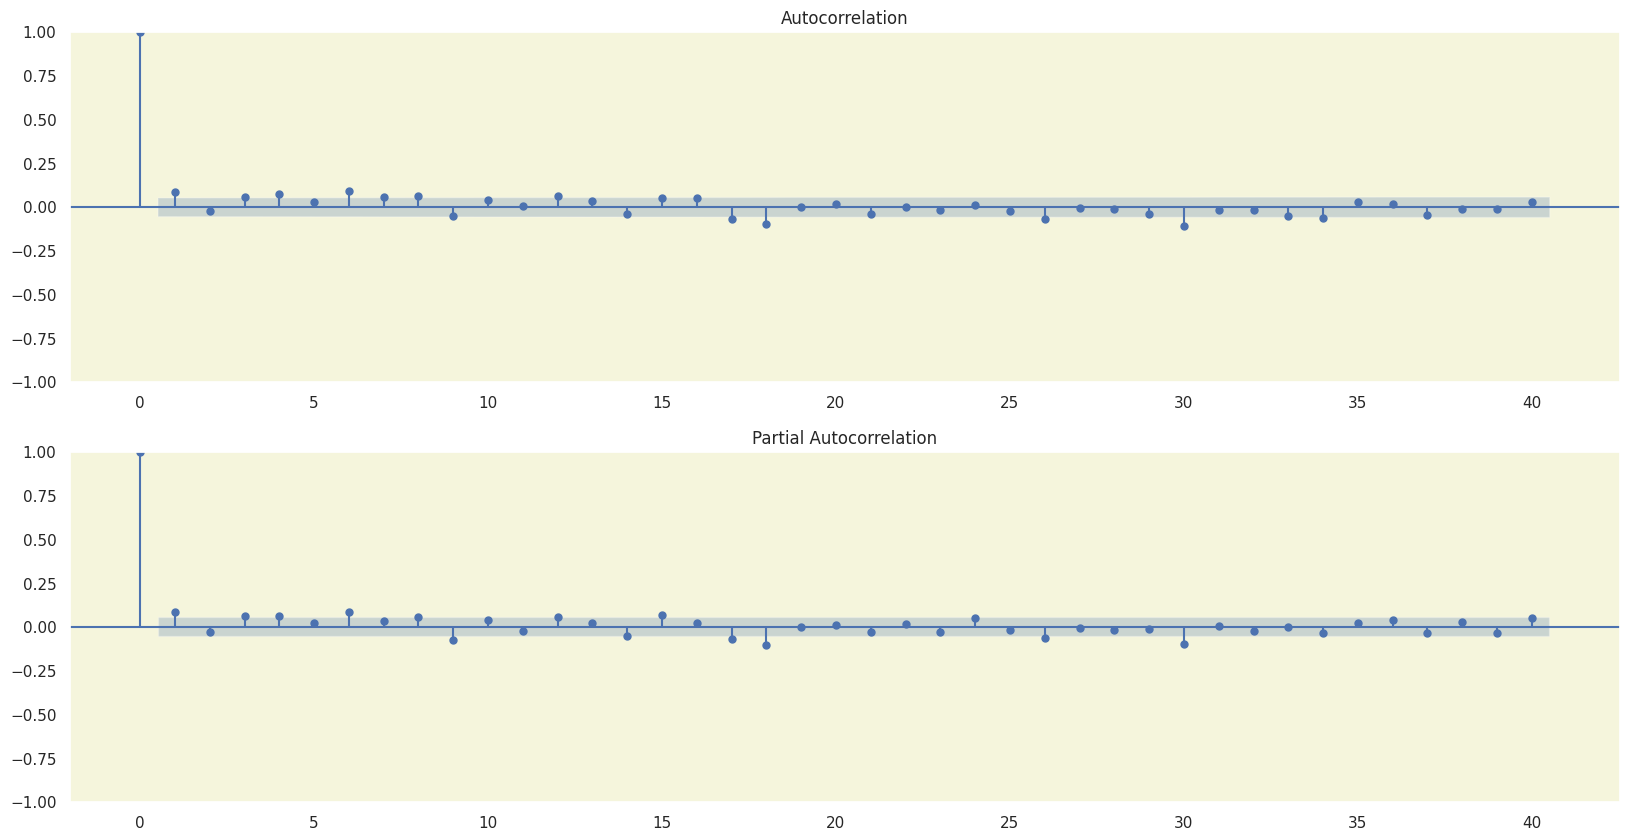

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df['Diff_Close'].dropna(), lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(df['Diff_Close'].dropna(), lags=40, ax=ax2)
plt.show()

In [17]:
df = df.dropna(how='all')


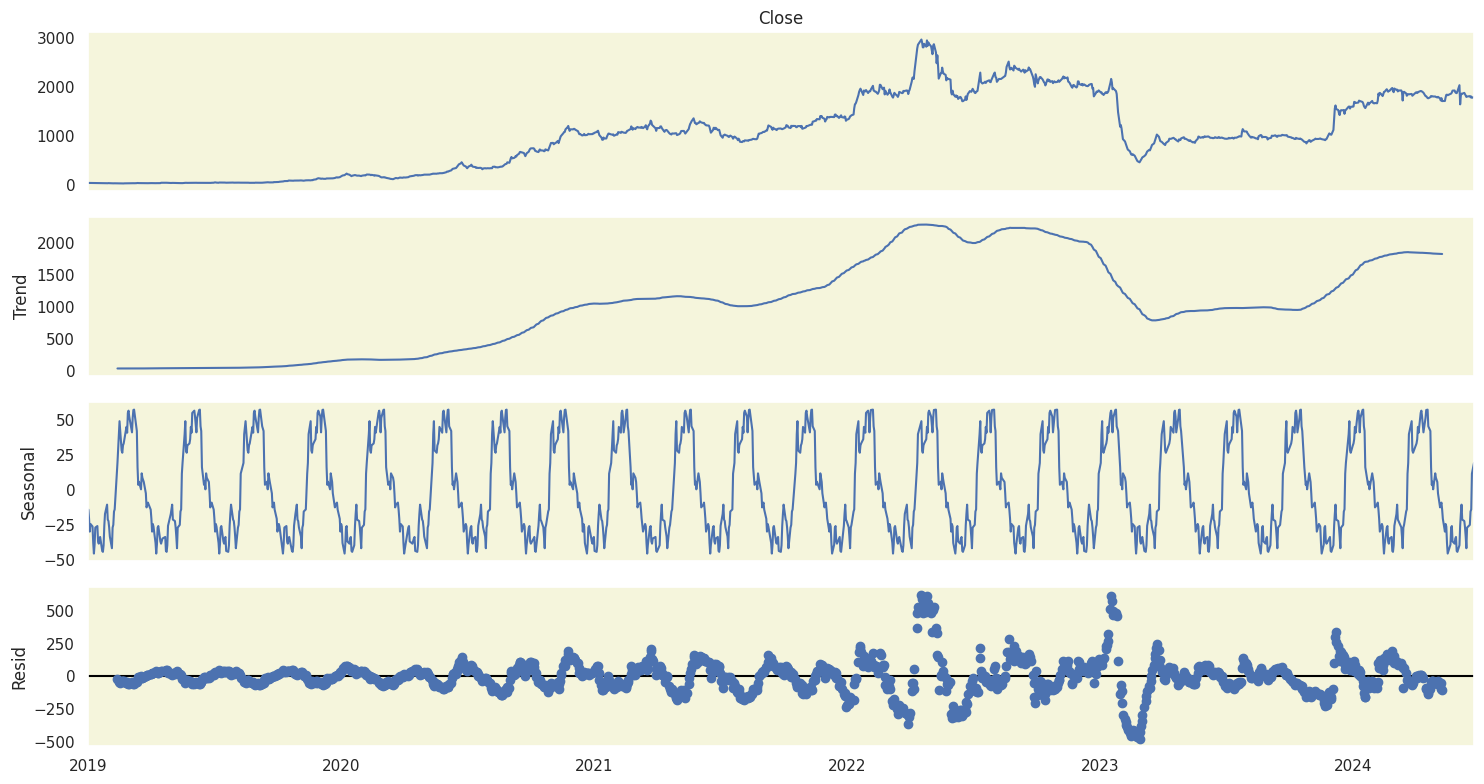

In [18]:
plt.rcParams["figure.figsize"] = (15,8)
from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import product
decomp = seasonal_decompose(df['Close'], model='additive', period=60)
decomp.plot()
plt.show()

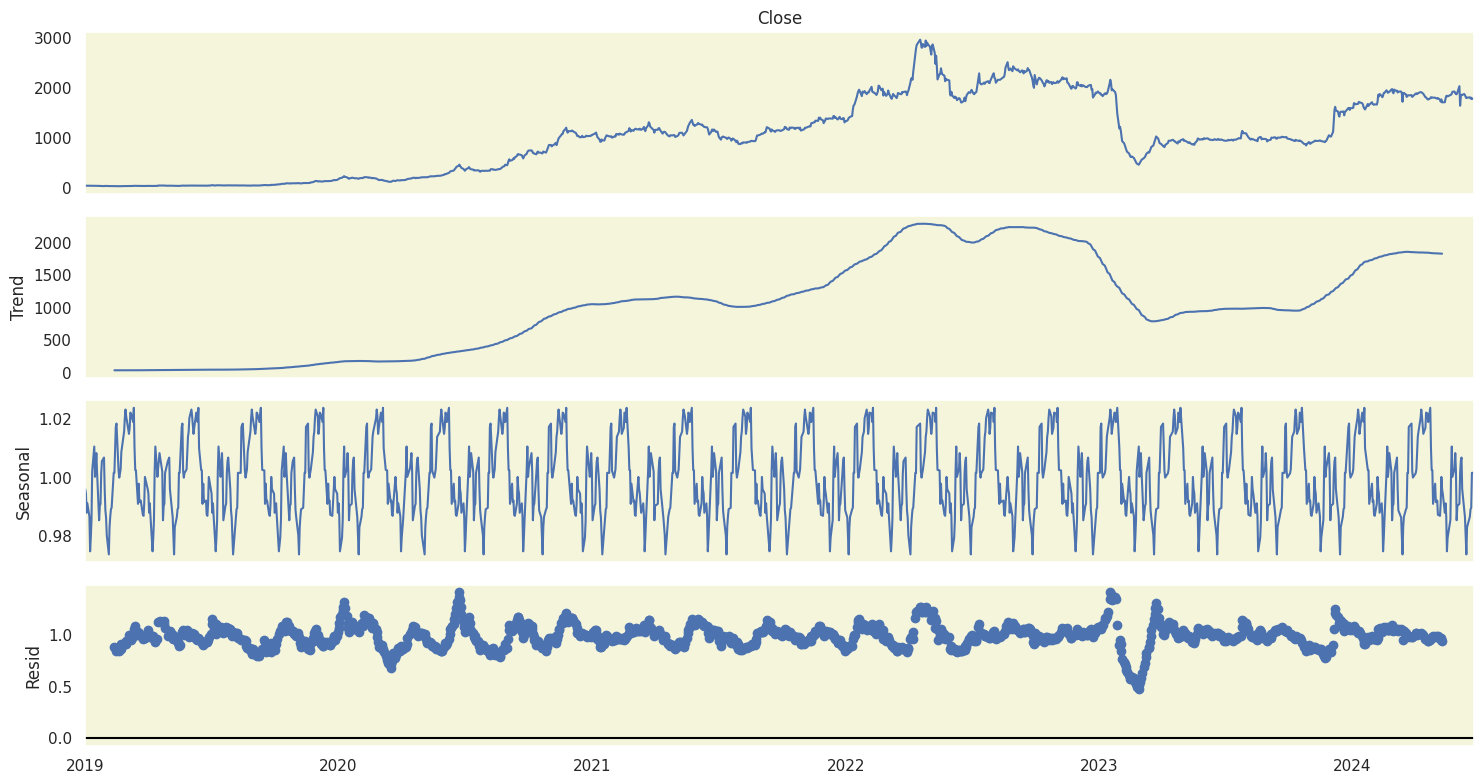

In [19]:
plt.rcParams["figure.figsize"] = (15,8)
from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import product
decomp = seasonal_decompose(df['Close'], model='multiplicative', period=60)
decomp.plot()
plt.show()

In [20]:
y = df['Close'].resample('MS').mean()
y.head()

,Close
Date,
2019-01-01,38.663044
2019-02-01,32.589474
2019-03-01,36.513889
2019-04-01,39.892106
2019-05-01,41.068182


In [21]:
train = y[:'2023']
test = y['2023':]

In [22]:
best_aic = float("inf")
best_order = None
p_values = range(0, 2)
d_values = range(1, 2)
q_values = range(0, 2)

for p, d, q in product(p_values, d_values, q_values):
    try:
        model = sm.tsa.ARIMA(train, order=(p, d, q))
        result = model.fit()
        aic = result.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
    except:
        continue
print("Best ARIMA order: ",best_order)

Best ARIMA order:  (0, 1, 0)


In [23]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(train, order=(0, 1, 0), seasonal_order=(1, 0, 1, 12), enforce_stationarity=False, enforce_invertibility=False)

fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                   60
Model:             ARIMA(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -321.297
Date:                            Tue, 17 Dec 2024   AIC                            648.594
Time:                                    01:42:21   BIC                            654.080
Sample:                                01-01-2019   HQIC                           650.650
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1687      2.276     -0.074      0.941      -4.629       4.292
ma.S.L12      -0.0688      2.315   

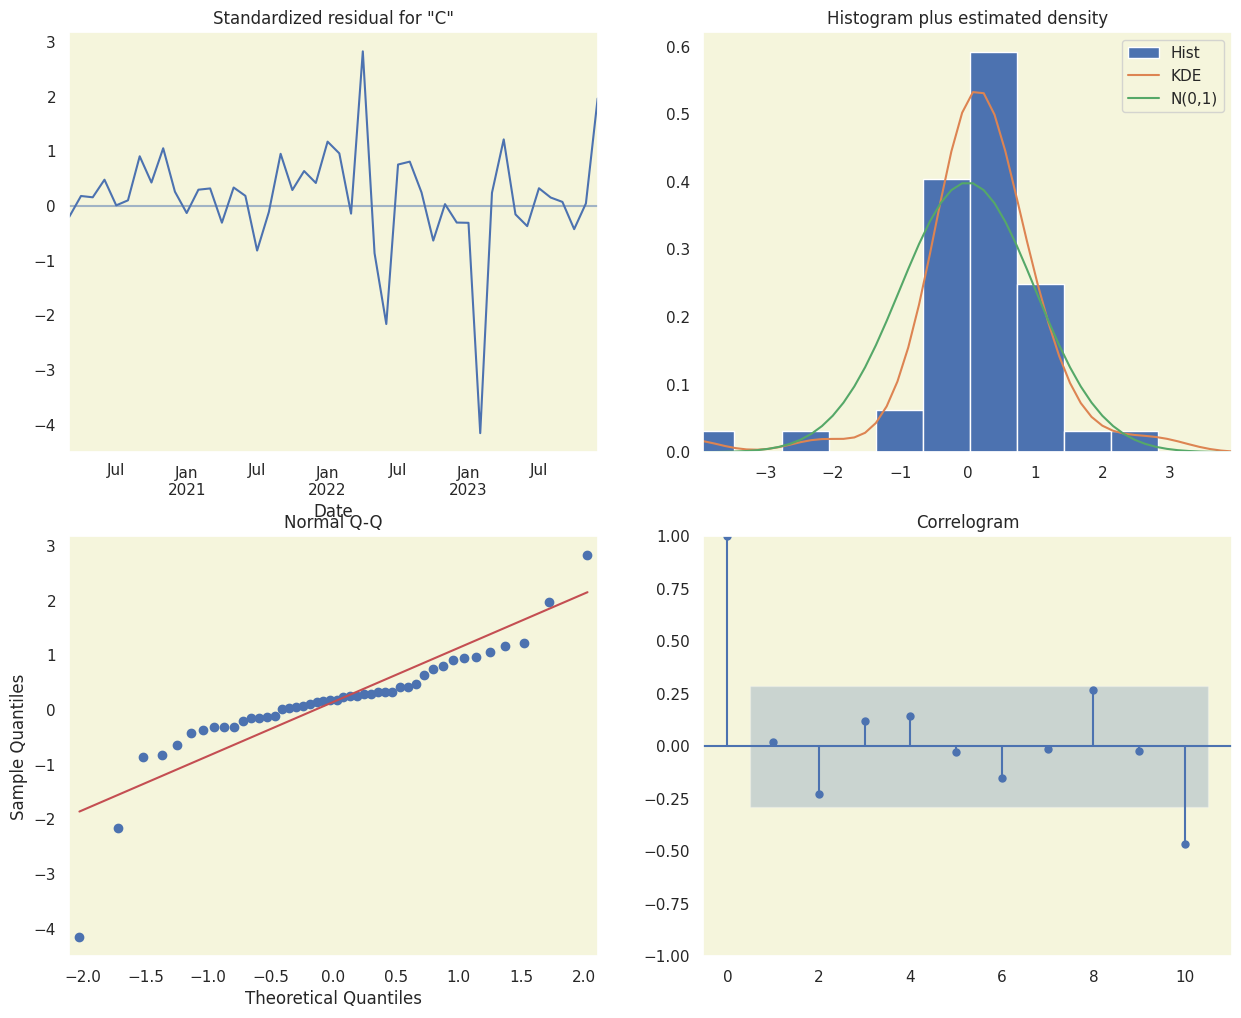

In [24]:
fitted_model.plot_diagnostics(figsize=(15, 12))
plt.show()


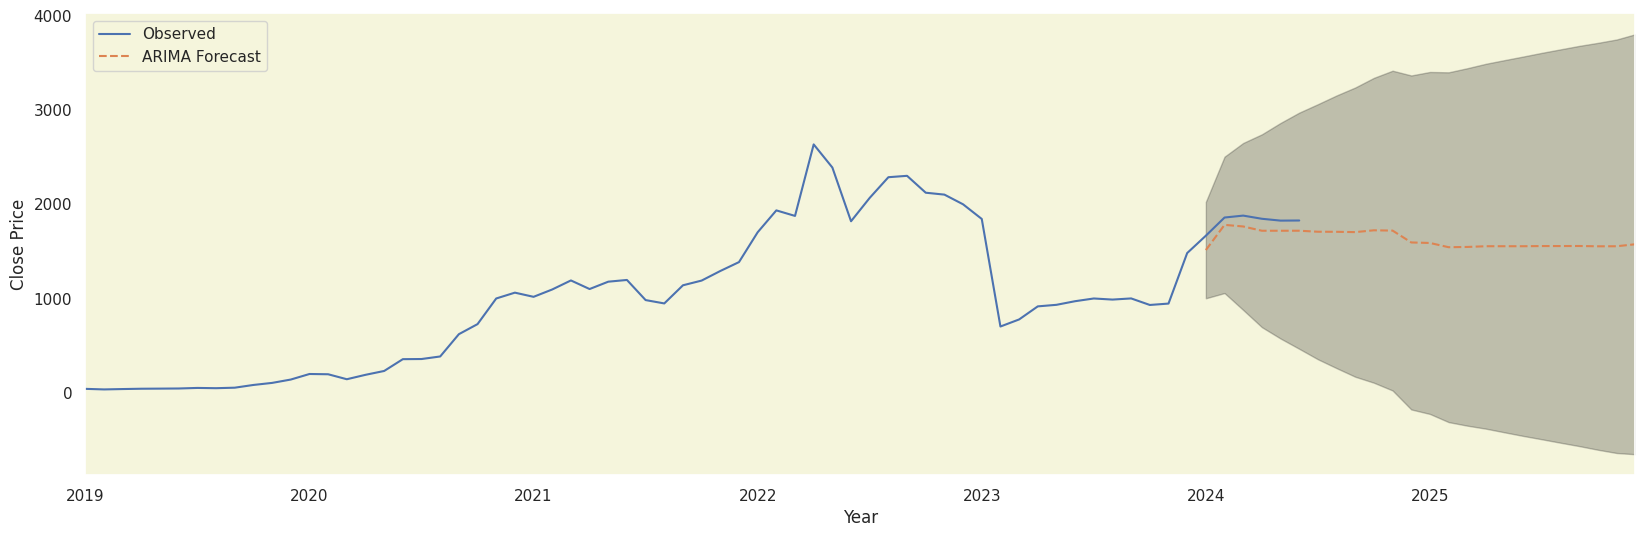

In [25]:
pred = fitted_model.get_forecast(steps = 24)
ax1 = y['2015':].plot(label = 'Observed')
pred.predicted_mean.plot(ax=ax1, label = 'ARIMA Forecast', figsize = (20, 6), linestyle = 'dashed')
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax1.set_xlabel('Year')
ax1.set_ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

In [26]:
y_forecasted_ARIMA = pred.predicted_mean
y_truth = test
mse_ARIMA = ((y_forecasted_ARIMA - y_truth)**2).mean()
print('The Mean Squared Error of ARIMA model is {}'.format(round(mse_ARIMA, 2)))
print('The Root Mean Squared Error of ARIMA model is {}'.format(round(np.sqrt(mse_ARIMA), 2)))



The Mean Squared Error of ARIMA model is 13689.15
The Root Mean Squared Error of ARIMA model is 117.0


In [27]:
#hyperparameter tuning using Grid Search
best_aic = float("inf")
best_order = None
p_values = range(0, 2) # Adjusted based on data availability
d_values = range(1, 2)
q_values = range(0, 2) # Adjusted based on data availability

for p, d, q in product(p_values, d_values, q_values):
    try:
        model = sm.tsa.statespace.SARIMAX(train, order=(p, d, q))
        result = model.fit()
        aic = result.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
    except:
        continue
print("Best SARIMA order: ",best_order)

Best SARIMA order:  (0, 1, 0)


In [28]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train, order=(0, 1, 0), seasonal_order=(1, 0, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
fitted_model = model.fit(maxiter=200, method ='nm')
print(fitted_model.summary())

Optimization terminated successfully.
         Current function value: 5.354954
         Iterations: 116
         Function evaluations: 204
                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -321.297
Date:                              Tue, 17 Dec 2024   AIC                            648.594
Time:                                      01:42:47   BIC                            654.080
Sample:                                  01-01-2019   HQIC                           650.650
                                       - 12-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

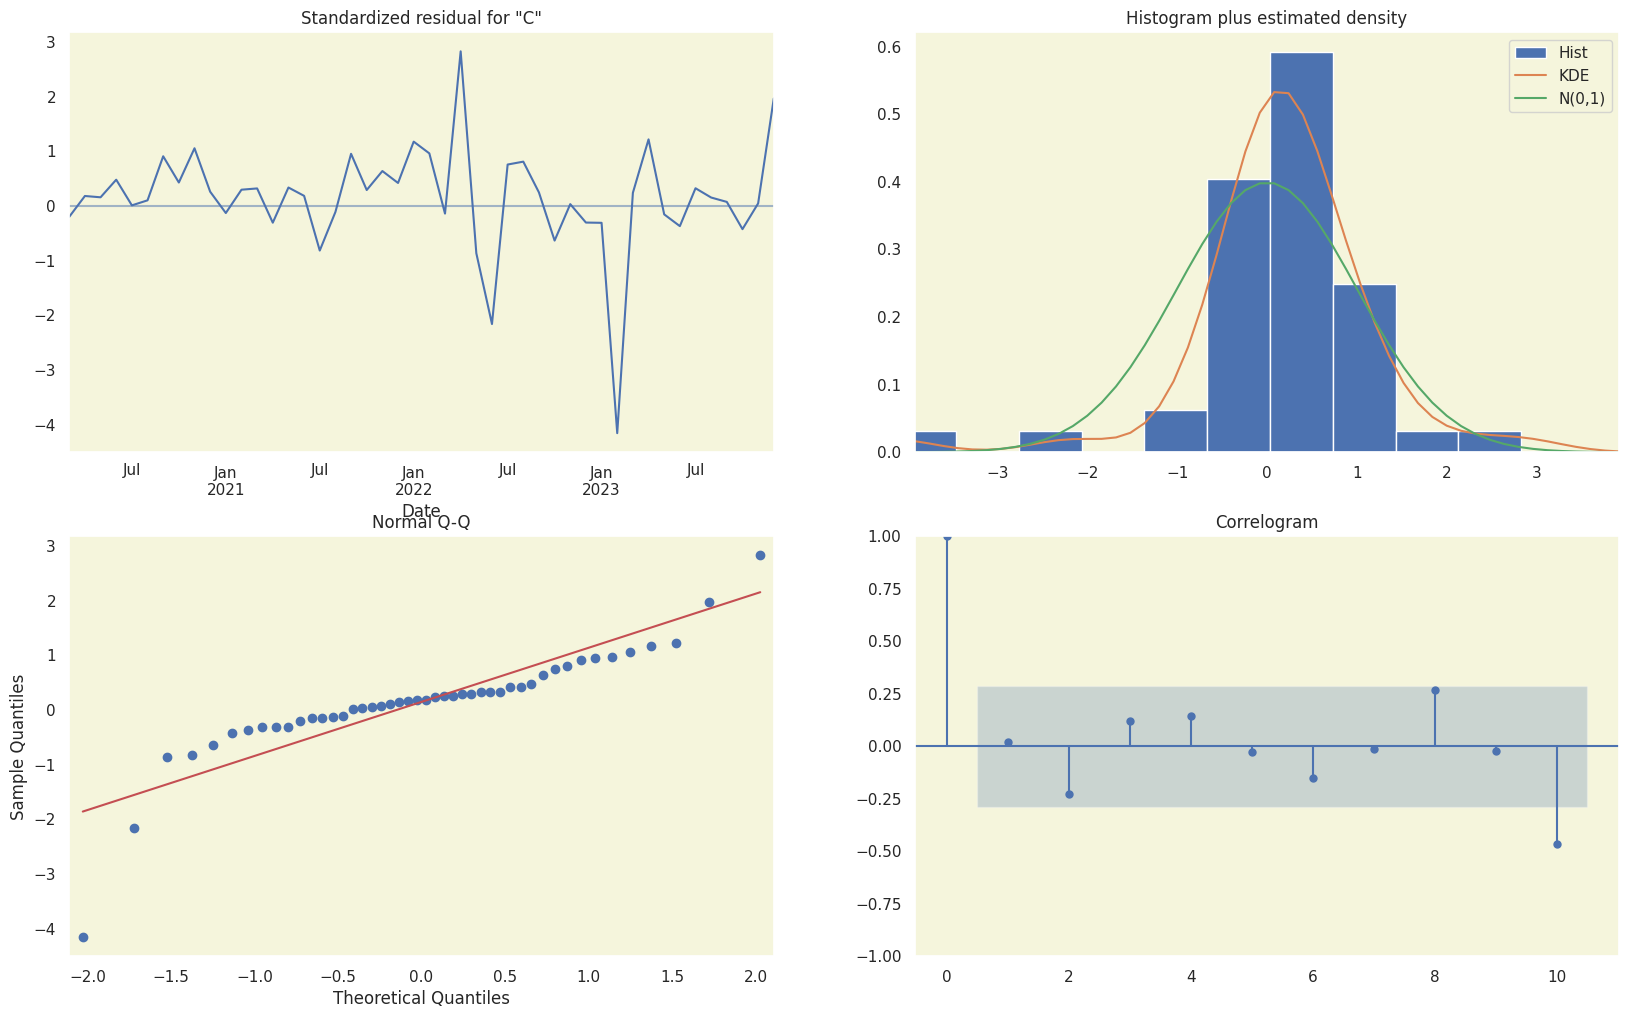

In [29]:
fitted_model.plot_diagnostics(figsize=(20, 12))
plt.show()

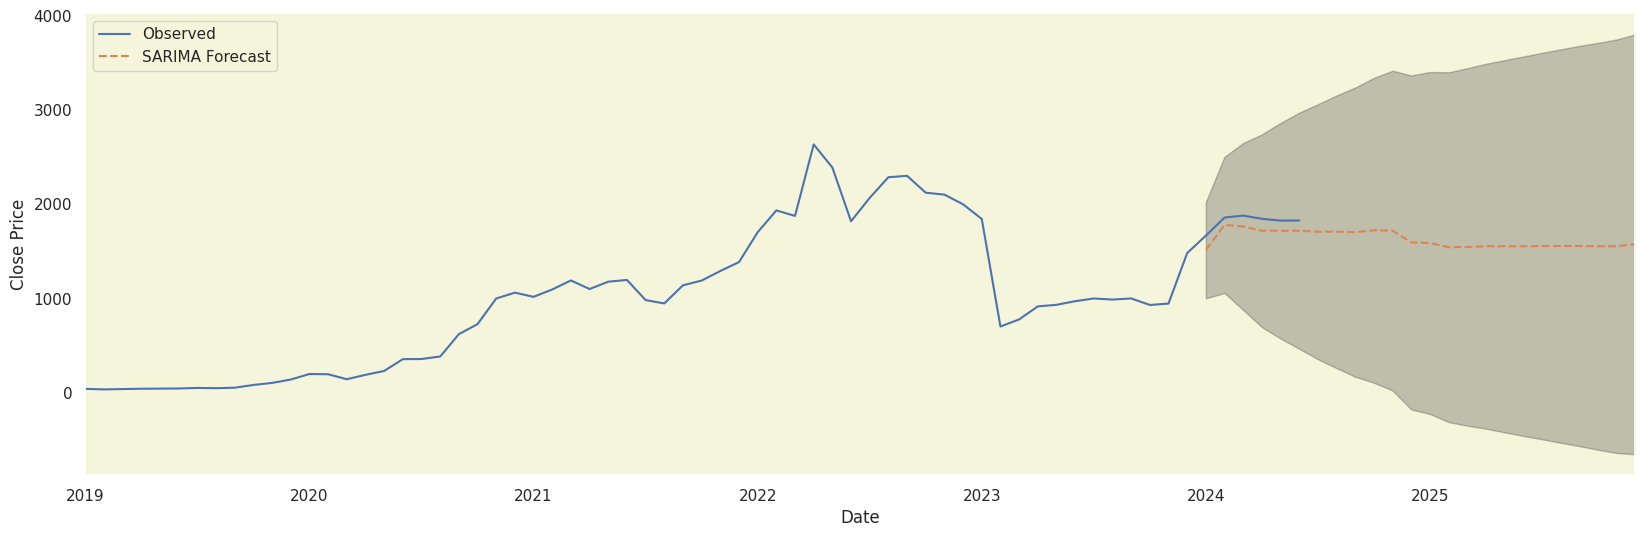

In [31]:
#Getting the SARIMAX forecast with number of steps as 24 since we want to make 2 year of prediction.
pred = fitted_model.get_forecast(steps = 24)
#plotting the observed and forecasted values:
ax1 = y['2015':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax1, label='SARIMA Forecast', figsize=(20, 6), linestyle='dashed')
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

In [32]:
y_forecasted_SARIMA = pred.predicted_mean
y_truth = test
mse_SARIMA = ((y_forecasted_SARIMA - y_truth)**2).mean()
print('The Mean Squared Error of SARIMA model is {}'.format(round(mse_SARIMA, 2)))
print('The Root Mean Squared Error of SARIMA model is {}'.format(round(np.sqrt(mse_SARIMA), 2)))

The Mean Squared Error of SARIMA model is 13689.35
The Root Mean Squared Error of SARIMA model is 117.0


In [33]:
df = df.dropna(how='all')

In [34]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Diff_Close
Date,,,,,,,
2019-01-01,41.849998,41.849998,41.150002,41.400002,41.400002,105166,NaN
2019-01-02,41.099998,42.500000,40.549999,41.150002,41.150002,288827,-0.250000
2019-01-03,41.500000,42.150002,40.750000,40.950001,40.950001,211035,-0.200001
2019-01-04,40.950001,41.299999,40.400002,40.549999,40.549999,169984,-0.400002
2019-01-07,41.000000,42.250000,41.000000,41.099998,41.099998,292864,0.549999


In [35]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Diff_Close'], dtype='object')

In [36]:
df1 = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,41.849998,41.849998,41.150002,41.400002,41.400002,105166
2019-01-02,41.099998,42.500000,40.549999,41.150002,41.150002,288827
2019-01-03,41.500000,42.150002,40.750000,40.950001,40.950001,211035
2019-01-04,40.950001,41.299999,40.400002,40.549999,40.549999,169984
2019-01-07,41.000000,42.250000,41.000000,41.099998,41.099998,292864


In [38]:
df2 = df1.reset_index('Date')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,41.849998,41.849998,41.150002,41.400002,41.400002,105166
1,2019-01-02,41.099998,42.500000,40.549999,41.150002,41.150002,288827
2,2019-01-03,41.500000,42.150002,40.750000,40.950001,40.950001,211035
3,2019-01-04,40.950001,41.299999,40.400002,40.549999,40.549999,169984
4,2019-01-07,41.000000,42.250000,41.000000,41.099998,41.099998,292864


In [39]:
#total sum
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


df2['Date'] = pd.to_datetime(df2['Date'])

#extract year from the 'Date' column
df2['Year'] = df2['Date'].dt.year

#calculate total open price of shares for each year
yearly_open = df2.groupby('Year')['Open'].sum().reset_index()

#create a pie chart with plotly using a qualitative color palette
fig = px.pie(yearly_open, values='Open', names='Year', title='Total Open Price of Shares by Year', color_discrete_sequence=px.colors.qualitative.Pastel)

#Customize layout
fig.update_layout(
    plot_bgcolor= 'rgb(17,17,17)',  #Dark background
    paper_bgcolor='rgb(17,17,17)',  #Dark background
    font=dict(color='white'),
    title_font_color='white',
    legend_title_font_color='white',
)
fig.show()

In [40]:
#Total Average
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


df2['Date'] = pd.to_datetime(df2['Date'])

#extract year from the 'Date' column
df2['Year'] = df2['Date'].dt.year

#calculate total open price of shares for each year
yearly_open = df2.groupby('Year')['Open'].mean().reset_index()

#create a pie chart with plotly using a qualitative color palette
fig = px.pie(yearly_open, values='Open', names='Year', title='Total Average Open Price of Shares by Year', color_discrete_sequence=px.colors.qualitative.Prism)  #using prism color palette

#customize layout
fig.update_layout(
    plot_bgcolor= 'rgb(17,17,17)',  #Dark background
    paper_bgcolor='rgb(17,17,17)',  #Dark background
    font=dict(color='white'),
    title_font_color='white',
    legend_title_font_color='white',
)
fig.show()

In [42]:
#group data by year and calculate the total open and close prices
yearly_prices = df2.groupby('Year').agg({'Open': 'sum', 'Close' :'sum'}).reset_index()

#Melt the dataframe to convert it to long format for stack plot
yearly_prices_melted = pd.melt(yearly_prices, id_vars=['Year'], var_name='Price Type', value_name='Price')

#create a bar chart with plotly using custom colors
fig = px.bar(yearly_prices_melted, x='Year', y='Price', color='Price Type',
             title = 'Yearly Open and Close Prices',
             labels = {'Price': 'Price($)', 'Year': 'Year'},
             color_discrete_map={'Open': 'blue', 'Close': 'red'},)

#customize layout
fig.update_layout(
    plot_bgcolor= 'rgb(240,240,240)',  #Light background
    paper_bgcolor='rgb(240,240,240)',  #Light background
    font=dict(color='black'),
    title_font_color='black',
    legend_title_font_color='black',
)
fig.show()


In [43]:
df - df.dropna(how='all')
df.head()

,Open,High,Low,Close,Adj Close,Volume,Diff_Close
Date,,,,,,,
2019-01-01,41.849998,41.849998,41.150002,41.400002,41.400002,105166,NaN
2019-01-02,41.099998,42.500000,40.549999,41.150002,41.150002,288827,-0.250000
2019-01-03,41.500000,42.150002,40.750000,40.950001,40.950001,211035,-0.200001
2019-01-04,40.950001,41.299999,40.400002,40.549999,40.549999,169984,-0.400002
2019-01-07,41.000000,42.250000,41.000000,41.099998,41.099998,292864,0.549999


In [45]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

print(df2.isna().sum())  #this will display the count of missing values

#define custom color palette
custom_palette = [ '#A20909', '#73C5C5', '#009595', '#003737']  # Light greenish and purplish

#function to handle missing values vefore decomposition (optional)

def handle_missing_values(data):
  #you can implement your preferred missing values handling method here
  # this simply drops the missign values
  return data.dropna()


# plots with plotly using the custom color palette

#1 Candlestick chart
fig1 = go.Figure(data=[go.Candlestick(x=df2['Date'],
                                      open=df2['Open'],
                                      high=df2['High'],
                                      low=df2['Low'],
                                      close=df2['Close'])])
fig1.update_layout(
    title='Torrent Power Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
)
fig1.show()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
dtype: int64


In [47]:
#2 HEatMap
fig2 = px.imshow(df2.corr(),
                 text_auto=True,
                 color_continuous_scale=custom_palette)
fig2.update_layout(
    title='correlation heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
)
fig2.show()

In [49]:
# 3d scatter

fig3 = px.scatter_3d(df2,
                     x='Open',
                     y='Close',
                     z='Volume',
                     color='Close',
                     opacity=0.7,
                     title='3D Scatter Plot of Open, Close, and Volume',
                     color_continuous_scale=custom_palette)
fig3.update_layout(
    scene=dict(
        xaxis_title='Open',
        yaxis_title='Close',
        zaxis_title='Volume',
    ))
fig3.update_traces(marker=dict(size=5))
fig3.show()


In [50]:
#violin plot
fig4 = px.violin(df2,
                 x='Year',
                 y='Close',
                 color='Year',
                 title='Violin Plot of Close Prices by Year',
                 color_discrete_sequence=custom_palette)
fig4.update_layout(
    xaxis_title='Year',
    yaxis_title='Close Price',
)
fig4.show()

In [52]:
#desity heatmap
fig5 = px.density_heatmap(df2,
                          x='Date',
                          y='Volume',
                          title='Density Heatmap : Trading vol over time',
                          color_continuous_scale=custom_palette)
fig5.update_layout(
    coloraxis_colorbar=dict(title='Density'),
    xaxis_title='Date',
    yaxis_title='Volume',
)
fig5.show()

In [54]:
# 7. Pairwise Scatter Plot Matrix
fig7 = px.scatter_matrix(df2, dimensions=['Open', 'High', 'Low', 'Close', 'Volume'], color='Close',
title='Pairwise Scatter Plot Matrix', color_continuous_scale=custom_palette)
fig7.update_traces(diagonal_visible=False)
fig7.show()